In [1]:
import pandas as pd
from DesafioNetflix import calculaAuto
import numpy as np
import random
import matplotlib.pyplot as plt
from DesafioNetflix import escolheAleatorio

In [2]:
df = pd.read_csv('ratings_small.csv', sep=',')
df = df.pivot_table(index='userId', columns='movieId', values='rating')
B, numero, linha, coluna = escolheAleatorio(df)


In [3]:


acertos = 0
qtd = 0
erros = 0
for _ in range(0,1000):
    df = pd.read_csv('ratings_small_formated.csv', sep=',')
    B, numero_, linha, coluna = escolheAleatorio(df)
    sigma, U, V_transposto = calculaAuto(B)
    B = U@sigma@V_transposto
    diferenca = abs(numero_ - B[linha][coluna])
    print(f"Esperado: {numero_}\nPalpite: {B[linha][coluna]}\nDiferença: {diferenca}\nQuantidade: {qtd}")
    if diferenca <= 1:
        acertos+=1
    else:
        
        erros+=1 
    qtd +=1
    with open('resultados.txt', 'a') as f:
        f.write(f"Esperado: {numero_}\nPalpite: {B[linha][coluna]}\nDiferença: {diferenca}\nQuantidade: {qtd}\n\n")

print(f"Acertos: {acertos}\nErros: {erros}")

Esperado: 4.0
Palpite: 1.3644483460100967
Diferença: 2.6355516539899035
Quantidade: 0
Esperado: 4.0
Palpite: 3.821246439412372
Diferença: 0.1787535605876278
Quantidade: 1
Esperado: 5.0
Palpite: 2.996242657641266
Diferença: 2.003757342358734
Quantidade: 2


KeyboardInterrupt: 

In [4]:
x = 405
numero_esperado = B[x][x]
B[404][404] = 1
sigma, U, V_transposto = calculaAuto(B)
sigma = pd.read_csv('sigma.csv', sep=',', header=None)
sigma = sigma.to_numpy()
b = U@sigma@V_transposto
print(f"Numero esperado: {numero_esperado}\nNumero achado: {B[x][x]}")

Numero esperado: 3.333333333333333
Numero achado: 3.333333333333333


In [39]:
df = pd.read_csv('ratings_small_format.csv', sep=',',header=None)
df = df.to_numpy()
B = df.copy()
x = 349
numero_esperado = B[x-1][x-1]
for p in range(1000000):
    i = np.random.randint(0,671)
    j = np.random.randint(0,9000)
    B[i][j] = random.randrange(1,6)
B[x-1][x-1] = 1
sigma, U, V_transposto = calculaAuto(B)
sigma = pd.read_csv('sigma.csv', sep=',', header=None)
sigma = sigma.to_numpy()
B = U@sigma@V_transposto
print(f"Ruidos: {p}\nNumero esperado: {numero_esperado}\nNumero achado: {B[x-1][x-1]}")

Ruidos: 999999
Numero esperado: 3.25
Numero achado: 3.0262347481057184


In [ ]:
df = pd.read_csv('ratings_small_format.csv', sep=',',header=None)
df = df.to_numpy()
B = df.copy()
x = 349

numero_esperado = B[x-1][x-1]
for p in range(1):
    i = np.random.randint(0,671)
    j = np.random.randint(0,9000)
    B[i][j] = random.randrange(1,6)
B[x-1][x-1] = 1
sigma, U, V_transposto = calculaAuto(B)
sigma = pd.read_csv('sigma.csv', sep=',', header=None)
sigma = sigma.to_numpy()
B = U@sigma@V_transposto
print(f"Ruidos: {p}\nNumero esperado: {numero_esperado}\nNumero achado: {B[x-1][x-1]}")

Ruidos: 0
Numero esperado: 3.25
Numero achado: 3.211839411184282


0.038183698271754274
0.2256779002870628
0.15568778547197315
0.1850790431355125
0.10158461692511178
0.23539464687878198
0.33915170147124885
0.09777129087753655
0.06796060039039364
0.20063905629595347
0.18860484543087885


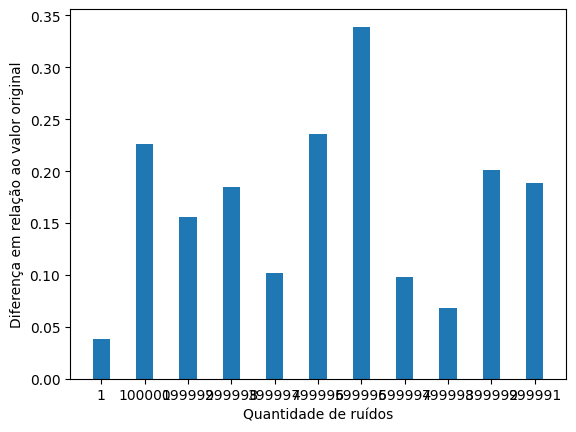

In [5]:
df = pd.read_csv('ratings_small_format.csv', sep=',',header=None)
df = df.to_numpy()
B = df.copy()
x = 349
numero_esperado = B[x-1][x-1]
diferencas = []

for p in range(1,1000000,99999):
    for l in range(p):
        i = np.random.randint(0,671)
        j = np.random.randint(0,9000)
        B[i][j] = random.randrange(1,6)
    B[x-1][x-1] = 1
    sigma, U, V_transposto = calculaAuto(B)
    sigma = pd.read_csv('sigma.csv', sep=',', header=None)
    sigma = sigma.to_numpy()
    B = U@sigma@V_transposto
    diferenca = abs(numero_esperado - B[x-1][x-1])
    print(diferenca)
    diferencas.append(diferenca)


ruidos = range(1,1000000, 99999)
# criar histograma de erro

x_pos = np.arange(len(ruidos))

plt.bar(x_pos, height=diferencas, align='center', width=0.4)
plt.xticks(x_pos, ruidos, rotation=45)
plt.xlabel('Quantidade de ruídos')
plt.ylabel('Diferença em relação ao valor original')
plt.show()

0.03829104262813843
0.17412844369967484
0.2739862517980032
0.37869384383679217
0.22176285925114847
0.20448654952231538
0.2707639938394375
0.2595245349066082
0.2122755530139866
0.21981456429773072
0.03214554984208817


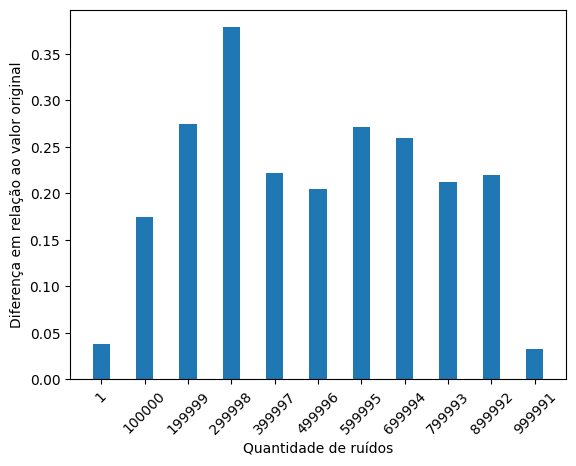

In [6]:
df = pd.read_csv('ratings_small_format.csv', sep=',',header=None)
df = df.to_numpy()
B = df.copy()
x = 349
numero_esperado = B[x-1][x-1]
diferencas = []

for p in range(1,1000000,99999):
    for l in range(p):
        i = np.random.randint(0,671)
        j = np.random.randint(0,9000)
        B[i][j] = random.randrange(1,6)
    B[x-1][x-1] = 1
    sigma, U, V_transposto = calculaAuto(B)
    sigma = pd.read_csv('sigma.csv', sep=',', header=None)
    sigma = sigma.to_numpy()
    B = U@sigma@V_transposto
    diferenca = abs(numero_esperado - B[x-1][x-1])
    print(diferenca)
    diferencas.append(diferenca)


ruidos = range(1,1000000, 99999)
# criar histograma de erro

x_pos = np.arange(len(ruidos))

plt.bar(x_pos, height=diferencas, align='center', width=0.4)
plt.xticks(x_pos, ruidos, rotation=45)
plt.xlabel('Quantidade de ruídos')
plt.ylabel('Diferença em relação ao valor original')
plt.show()

In [4]:
df = pd.read_csv('ratings_small_format.csv', sep=',',header=None)
df = df.to_numpy()
B = df.copy()
x = 349
numero_esperado = B[x-1][x-1]
diferencas = []

for p in range(0,1000001,100000):
    for l in range(p):
        i = np.random.randint(0,671)
        j = np.random.randint(0,9000)
        B[i][j] = 5
    B[x-1][x-1] = 1
    sigma, U, V_transposto = calculaAuto(B)
    sigma = pd.read_csv('sigma.csv', sep=',', header=None)
    sigma = sigma.to_numpy()
    B = U@sigma@V_transposto
    diferenca = abs(numero_esperado - B[x-1][x-1])
    print(diferenca)
    diferencas.append(diferenca)


ruidos = range(0,1000001, 100000)
# criar histograma de erro

x_pos = np.arange(len(ruidos))

plt.hist(x_pos, height=diferencas, align='center', width=0.4)
plt.xticks(x_pos, ruidos, rotation=45)
plt.xlabel('Quantidade de ruídos adicionais')
plt.ylabel('Diferença em relação ao valor original')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 671 is different from 100)

In [6]:
acertos = 0
qtd = 1
erros = 0
df = pd.read_csv('ratings_small_formated.csv', sep=',')
for _ in range(0,1000):
    B, numero_, linha, coluna = escolheAleatorio(df)
    sigma, U, V_transposto = calculaAuto(B)
    B = U@sigma@V_transposto
    diferenca = abs(numero_ - B[linha][coluna])
    print(f"Esperado: {numero_}\nPalpite: {B[linha][coluna]}\nDiferença: {diferenca}\nQuantidade: {qtd}")
    if diferenca <= 1.5:
        acertos+=1
    else:
        erros+=1 
    qtd +=1
    with open('resultados.txt', 'a') as f:
        f.write(f"nº interação: {qtd}\nEsperado: {numero_}\nPalpite: {B[linha][coluna]}\nDiferença: {diferenca}\n\n")
    with open('diferencas.txt', 'a') as f:
        f.write(f"{diferenca}")
print(f"Acertos: {acertos}\nErros: {erros}")

AAAAAAAAAAA238 - 2497
Esperado: 4.0
Palpite: 3.925849135385658
Diferença: 0.07415086461434184
Quantidade: 1
AAAAAAAAAAA499 - 3872
Esperado: 3.5
Palpite: 2.578237346345168
Diferença: 0.9217626536548318
Quantidade: 2
AAAAAAAAAAA118 - 233
Esperado: 5.0
Palpite: 5.191038213734509
Diferença: 0.19103821373450902
Quantidade: 3


KeyboardInterrupt: 